In [120]:
# coding: UTF-8
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import h5py
import csv
import math
import pandas as pd
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.animation as animation
from matplotlib.animation import ArtistAnimation

dir = '/Users/maeda/Desktop/'

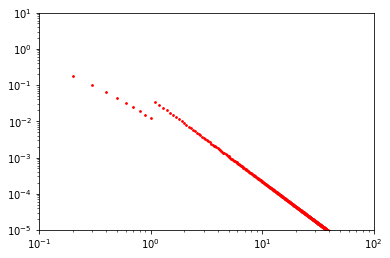

In [128]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

plt.xlim(0.1, 100)
#plt.ylim(0.001, 0.1)
plt.ylim(0.00001, 10)
ax.set_yscale('log')
ax.set_xscale('log')

data01,data02 ,data03 = np.loadtxt(dir+'IMF.dat', delimiter=',', unpack=True)
#plt.scatter(10.0**data01, 10.0**data03/20000.0, s=3.0,c='red')
plt.scatter(data01, data03, s=3.0,c='red')

#plt.gca().set_aspect('equal')


plt.show()